## Regression

Model purpose: given a job description, predict a score for the job description.

### Download and loading of dataset

In [2]:
import kagglehub
import os
import pandas as pd
# Download latest version to the specified directory
# path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

path = "/home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13"

print(f"Path to dataset files: {path}")
print(f"List of files in the dataset: {os.listdir(path)}")

/home/leon/.cache/pypoetry/virtualenvs/nlp-linkedin-offers-4RXahsWL-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13
List of files in the dataset: ['postings.csv', 'mappings', 'companies', 'jobs']


**Drop indexes with NaN values**

In [3]:
postings_path = path + "/postings.csv"
postings_df = pd.read_csv(postings_path)

Nb of single posting normalized salary: [ 38480.  83200.  55000. ... 159200. 210850. 177375.]
Unique normalized salaries: 7259
Nb rows: 36073


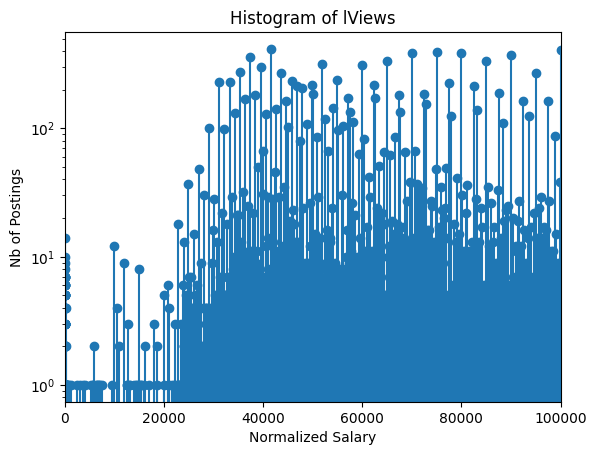

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
9237,3886471794,Eastridge Workforce Solutions,Intellectual Property Associate (246215),Eastridge Workforce Solutions has partnered wi...,275000.0,HOURLY,"Dallas, TX",9814.0,4.0,NaN,...,NaN,1.712637e+12,www.datafrenzy.com,0,FULL_TIME,USD,BASE_SALARY,535600000.0,75201.0,48113.0


In [117]:
import matplotlib.pyplot as plt
import numpy as np

# print(postings_df['pat_period'].value_counts())
# print(f"Nb of YEARLY salary: {len(postings_df['pay_period'] == 'YEARLY')}")
# print(f"Nb of HOURLY salary: {len(postings_df['pay_period'] == 'HOURLY')}")


max_sal_df = postings_df.copy()
max_sal_df.dropna(subset=["normalized_salary"], inplace=True)
print(f"Nb of single posting normalized salary: {max_sal_df['normalized_salary'].unique()}")


unique, counts = np.unique(max_sal_df["normalized_salary"], return_counts=True)
print(f"Unique normalized salaries: {len(unique)}")
print(f"Nb rows: {len(max_sal_df)}")
# Show job posting with max salary


plt.stem(unique, counts)
plt.xlim(0, 1000000)
plt.xlabel("Normalized Salary")
plt.yscale("log")
plt.ylabel("Nb of Postings")
plt.title("Histogram of lViews")
plt.show()


postings_df.sort_values(by='normalized_salary', ascending=False).head(1)


In [5]:
# Make a copy of useful columns
useful_cols = ["job_id", "company_name", "title", "description", "views", "skills_desc"]
views_df = postings_df[useful_cols].copy()
views_df.dropna(subset=["description", "views"], inplace=True)

**Cleaning the descriptions of unwanted characters such as emojis etc**

In [6]:
import re

# Nettoyage de base
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d{10,}', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the clean_text function and ASSIGN the result back
views_df['description'] = views_df['description'].apply(lambda x: clean_text(x))

### Data analysis (views column)

Number of rows: 122153
Number of columns: 6
count    122153.000000
mean         14.618364
std          85.906019
min           1.000000
25%           3.000000
50%           4.000000
75%           8.000000
max        9975.000000
Name: views, dtype: float64
Number of unique values in the 'views' column: 684
Number of rows with 1 views: 4587
Number of rows with 2 views: 14417
Number of rows with 100 views: 29


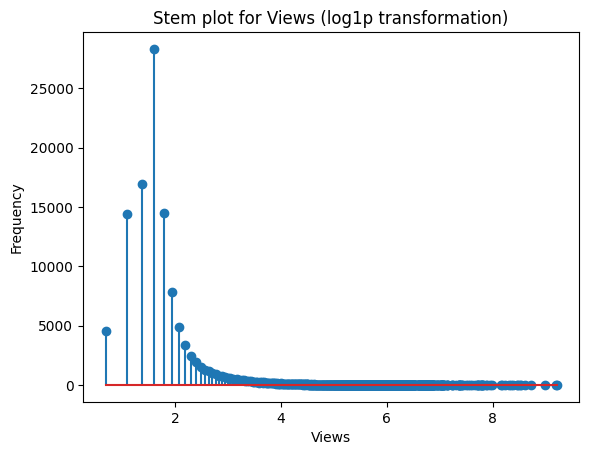

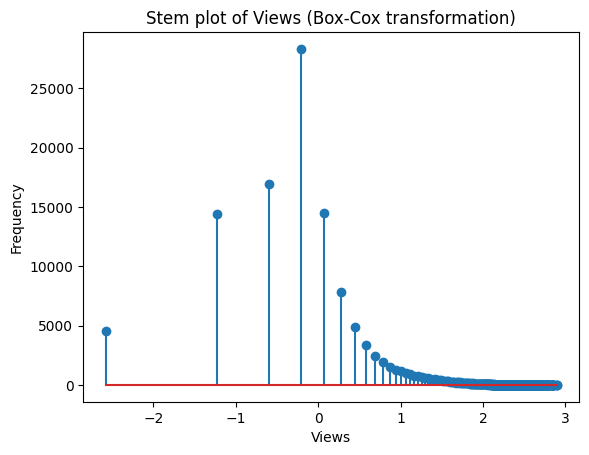

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer


# Quick overview of the dataset
print(f"Number of rows: {views_df.shape[0]}")
print(f"Number of columns: {views_df.shape[1]}")

# display basic statistics on useful columns
# for col in useful_cols:
#     print(f"{col}: {postings_df[col].dtype}")
#     print(f"Statistics for {col}:")
#     print(postings_df[col].describe())
#     print()

# postings_df["views"] = postings_df["views"].astype("Int64", errors="raise")

# Display the first few rows of the DataFrame
# print(postings_df.head())
# print(postings_df["description"][0])

# Dropna for the views and description columns
# print(f"Number of rows before dropping NaN values: {postings_df.shape[0]}")
# postings_df.dropna(subset=["views", "description"], inplace=True)
# print(f"Number of rows after dropping NaN values: {postings_df.shape[0]}")

# Basic statistics on the views column
print(views_df["views"].describe())
print(f"Number of unique values in the 'views' column: {views_df["views"].nunique()}")
print("Number of rows with 1 views:", len(views_df[views_df["views"] == 1]))
print("Number of rows with 2 views:", len(views_df[views_df["views"] == 2]))
print("Number of rows with 100 views:", len(views_df[views_df["views"] == 100]))

test_views = np.log1p(views_df["views"])
unique, counts = np.unique(test_views, return_counts=True)

plt.stem(unique, counts)
# plt.xlim(9000, 10000)
plt.xlabel("Views")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title("Stem plot for Views (log1p transformation)")
plt.show()


pt = PowerTransformer(method='box-cox')
data_bc = pt.fit_transform(np.array(views_df["views"]).reshape(-1, 1))

unique, counts = np.unique(data_bc, return_counts=True)
plt.stem(unique, counts)
# plt.xlim(9000, 10000)
plt.xlabel("Views")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title("Stem plot of Views (Box-Cox transformation)")
plt.show()

### Transform data

In [ ]:

views_df["views"] = views_df["views"].astype("Int64", errors="raise")

# Apply Box C

### Test Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(views_df["description"], views_df["views"], test_size=0.2, random_state=42)

pt = PowerTransformer(method='box-cox')

y_train_bc = pt.fit_transform(np.array(y_train).reshape(-1, 1)).flatten()
y_test_bc = pt.transform(np.array(y_test).reshape(-1, 1)).flatten()

tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_tfidf, y_train_bc)

y_pred_bc = linear_reg_model.predict(X_test_tfidf)
y_pred_original = pt.inverse_transform(y_pred_bc.reshape(-1, 1)).flatten()

rmse = root_mean_squared_error(y_test, y_pred_original)
print(f"RMSE: {rmse:.2f}")

# Optional: Check first few predictions vs actual
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_original
})


RMSE: 108.38
        Actual  Predicted
114224     2.0   4.677983
49158      8.0   4.331653
86040      4.0   5.369432
68137     24.0   5.836879
73427      2.0   3.058111


In [22]:
print(results.head(50))


        Actual  Predicted
114224     2.0   4.677983
49158      8.0   4.331653
86040      4.0   5.369432
68137     24.0   5.836879
73427      2.0   3.058111
49867    116.0   7.410954
84366      4.0   3.841301
113873     2.0   2.995953
120662     2.0   7.808111
101641     4.0   3.324817
35270      4.0   4.240348
44703      7.0   4.973918
115844     3.0   6.321157
3820       5.0   2.779247
99634      3.0   3.378046
26049      1.0   3.381231
29778      1.0   5.342497
15565      8.0   6.076761
92382     22.0   4.439100
50440    337.0   5.245991
16051      5.0   5.701571
45243     20.0   4.644771
57107      4.0   6.503089
23898      7.0   5.092797
30978      3.0   4.254645
111075     6.0   5.432154
34000      1.0  12.655884
61583      5.0   6.108063
87591      2.0   4.033569
81476      4.0  10.730781
52782      6.0   3.765122
19112      4.0   5.109857
97216      4.0   3.906818
112665     3.0   5.222361
45022     11.0   4.901806
2823       5.0   4.063335
82576      4.0   4.187771
121520     2